In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders1/*榮剛*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders1\\2013榮剛致股東.txt',
 './letterto shareholders1\\2014榮剛致股東.txt',
 './letterto shareholders1\\2015榮剛致股東.txt',
 './letterto shareholders1\\2016榮剛致股東.txt',
 './letterto shareholders1\\2017榮剛致股東.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 2.357 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['107','2017',':','2018','2035','到','為主','都','面對','／','尤其','企業','影響','機電','原物','產品','主要','同時','加上','柒萬元','同期','逐步','四年','億陸仟','六年','五年','受到','另外','貨幣','進行','三年','單位','汽車','紙業','作業','目前','公司','年度','隨著','各位','方面','台北市','萬元','濕紙','市場','本期','士林','衡量','伍拾','鋼材','馬達','仟元','台幣','拋光','稅後','萬元','馬達','107','2017',':','2018','2035','電廠','出租','內容','延伸','推出','分別','五年','行情','品牌','使用','突破','媒體','取得','兩岸','美元','生活','今年','元月','逐漸','領域','內容','成果','月份','推出','費用','取得','資訊','原料','一年','包含','春節','每桶','巴西','情資','用戶','前年','全力','建立','認證','流量','會員','去年','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','商城','吳玉堂','中國國','半導體','官學','雲端','抗菌','美洲','病毒','卡亦持續','億柒仟','不動產處','機構','內政部','冰箱','智能化','半導體','公寓','飲品','旅館','韓國','以上','街上','文青','浪潮','故事','服務據點','椰子','機械','太陽能','美術','都市','創意','失業率','市府','安全','審議','土地','位廣告','仟元','年產','減排','智能','能效','自動化','工程','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化','改版','引擎','年樂利','社群','台港澳','使用者','資安','果核','會員數','組件','群俠','玩法','儲能','企業社','人林','週年','仍須','七年','並以','單體','仍將','化生','之重','之數據','主義國家','中旬','英國','脫歐','澳洲','設備','化學產品','中油','合宜','打造','情境','到','引進','便利商店','實力','四大','天即','受惠','園區','商事','全亞洲','全民','代理','人數','事前','如鹽','上線','天堂','商圈','智通','零售','英雄','觸角','萬人','富錦街','能源管理','威肯','代收','油公司','更積','所有','節能','減碳','全產','新三輕','全銷','新營','工廠','為主','反觀','三十八','休閒','下同','七十年','新營廠','下油','下油價','都','一佰','面對','為','萬餘元','廠歲','輕裂','；','：','年','執照','四年','印度','加工品','億四仟','度','東南亞','全方位','全網','全生態','億次','酷瞧','貝果','電商','群募','樂利','新媒體','天貓','夥伴','日本','更','個體','互動式','鋼鐵產業','互動娛','豐富','影音','服務事業','之太陽能','免費','中華網','收為','家電','十一月','億萬餘元','食品','聚酯','原油','共生','華越','必須','漿價','紙張','一佰','第四季','億一仟','四佰萬元','九佰萬元','二佰萬元','來','用','了','略','目前','然而','無論','雖然','開始','超過','／','尤其','，','（','）','的','由','較','與','達','此外','致力','約','等','相關','至於','第','關於','雖','第一季','萬元','萬','這些','這樣','近','公司','發展','年度','持續','提供','發展','主要','影響','我們','大同','智冠','台紙','台苯','榮剛','未來','先生','因素','台幣','台灣','事業','市場','產品','產業','應用','成長','經濟','企業','億元','全年','可能','受到','方面','加上','以及','已經','萬噸','同時','年月日','年','月','日','其中','苯乙烯','乙苯','各項','遊戲','各位','手遊','化工','模具','支付','永續','美國','電子','服務','平台','合作','將持續','決議','紙器','甲苯','二甲苯','紙業','智慧','集團','創新','研發','多元','旗下','公噸','整合','開發','能源','廣告','技術','科技','授權','布局','紙漿','紙產線','氧化','航太產業','正式','一頁','預期','預期','三家','其年','電網','因此','智付','銷媒體','位內容','加值','玩家','因此','油氣產業','航太產業','鋼品','球場','稅後','使得','不僅','以上','太陽能','美術','位廣告','仟元','基產品','工業','木漿','苛性','液體','第三季','龍井','住宅','化學品','固體','基地','平板','建案','建照','氯化','碳酸','石化','七月','仍將','機電','之家電','網路','戲產品','手機','除了','第三方','行動','除了','不同','包括','可以','智慧型','線上','裝置','軟體','油品','飛機','鋼廠','油氣','之淨現','橘子','伺服器','劉柏園','樂點','運團隊','一研','三國','之星','三成','優化','優化近','兩成','萬公噸','乙烯','一佰萬元','三佰萬元','第二季','二年','五佰萬元','及其','生產廠','膠皮','萬碼','一佰','三年','上半年','越南','別墅','華越','高爾夫','之一','别墅','打球','木片','一消','一長','三期','二期','五期','亦需','原油','大樓','汽電','油價','石化','一本初衷','一般','七月','下半年','並出','並在','節能','期以','健康','動能','機電','歡樂','樂利','之家電','數據','改版','之機','手機','娛樂','數位','之產品給','網路','今後對','戲產品','動遊戲','中華網','幹線','工具','鋼材','航空','商務','航太','高值','高值化']
puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['壹 致股 東報 告書 一 前 一 營業 結果 於 歐盟 景氣 回溫 緩慢 化 寛 鬆 政策 財政 危機 中國大 成 長 減緩 結構 調整 各區域 競爭激 内部 受 鋼設備 損壞 維修影 響產能 導致 客戶 下單 疑慮 全 合 併 營收 和 獲 均 如 其全 合 併 營業額 縮減 合 併 稅前 淨 縮減 合 併 營業額 及稅 前淨 情形 分 份 營業 收入 營業 毛 營業淨 稅前 淨 一 預算執 情形 營業 收入 淨額 預算 達成 稅後淨 預算 達成 是 受 歐洲 景氣 未起 損壞 鋼水產出 產能 無法 發揮 是 導致業績 下 主因 份 項目 預算 實際 達成 營業 收入 淨額 營業 毛 營業淨 稅前 淨 稅後淨 二 財務 收支 及 獲 能 財務 收支 本 合 併 營業 活動 入新 係 因 應收 帳款 收現 及 低庫存 所致 合 併 投資 活動 出新 係 因 擴廠 購置 固定 資產 所致 合 併 籌資 活動 出新 係 因償還 短期 借款 及 發放現 股 所致 獲 能 分析 資產 報酬 股東權 報酬 營業 占實 收資本 比 稅前 占實 收資本 比 基本 每股 盈餘 三 研究 檢討 明 在 奠定 轉型 後 新產品 已達 成階段 性任 務 進入 全球 水 生醫 供 應鏈 後 對 生產技術 穩定 也 越 越 重要 導入 穩定 是 重要 政策 清淨級 之 級 很廣 除 產業外 其 和 塑模 業等用 也廣 未 十 間 訂單 仍 是 高峰 針對 此 鋼 供應 也 反應 在 上 搭配 各產業 擴大 建置 以滿足 高清 淨 級材 需求 續 增加 在材 品質 要求 也 相當 繁雜 得 有 任何 疏失 穩 定 製 程 管控 每 一生 產細節 斷 改善 是 最 重要 工作 除 在 擴充 提 昇 品級 外 符合 高端 材 品質 競爭 提升 人才 傳承 培育 依然 是 要 推動 在 明 工作 重點 規劃 建 於 各產業 之 共通 新 製 程 技 術 建 既有 製 程 技 術 之 提 昇 二 本 營業 計畫 一 銷售 內銷 國內 是 以 基礎 用材 台灣產業 化發展 其 特殊 合 材 等級 也 漸漸 提高 因應 政府 對 全面 開放態 國內 將以 深耕 在 地產業 主 以 在 地 生產 優勢 好品 質應 戰大 鋼 品 汽 機與 船塢 穩定 也 是 國內 重要 受世 界 肯定 該產業 客 製 化

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  1702


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (5, 1702)


<5x1702 sparse matrix of type '<class 'numpy.float64'>'
	with 3279 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
中國 0.06921876014697147 0 43
低成本 0.09375803886775988 0 152
全球 0.23534378449970297 0 231
各國 0.06921876014697147 0 374
各產業 0.055375008117577174 0 384
品質 0.08306251217636576 0 396
員工 0.058105336260321896 0 398
國內 0.09690626420576005 0 447
國際化 0.058105336260321896 0 466
基礎 0.06921876014697147 0 494
增加 0.12459376826454864 0 507
外部 0.05837073132784581 0 517
客戶 0.055375008117577174 0 554
帶動 0.06547106580505171 0 651
提升 0.06921876014697147 0 785
提高 0.08183883225631465 0 789
損壞 0.058105336260321896 0 791
擴充 0.05837073132784581 0 796
政策 0.11075001623515435 0 831
既有 0.09728455221307634 0 859
景氣 0.06921876014697147 0 869
條棒 0.058105336260321896 0 922
歐洲 0.06547106580505171 0 956
每位 0.058105336260321896 0 977
深耕 0.08306251217636576 0 1024
營業 0.13843752029394293 0 1062
特殊 0.055375008117577174 0 1070
環境 0.09690626420576005 0 1093
生產 0.055375008117577174 0 1099
疑慮 0.058105336260321896 0 1139
目標 0.055375008117577174 0 1167
相當 0.08306251217636576 0 1172
稅前 0.055375008117577174 0 1205
穩

達成 0.10057560069181994 4 1521
重要 0.18605695743718675 4 1548
重點 0.11449658919211493 4 1550
銷售 0.0858724418940862 4 1553
鋼水 0.06007098727228918 4 1580
需求 0.20036903108620113 4 1646
預算 0.10057560069181994 4 1660
風險 0.0507644195929572 4 1673


### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [9]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders1\2013榮剛致股東.txt,./letterto shareholders1\2014榮剛致股東.txt,./letterto shareholders1\2015榮剛致股東.txt,./letterto shareholders1\2016榮剛致股東.txt,./letterto shareholders1\2017榮剛致股東.txt
0,一個,0.016368,0.030912,0.033052,0.019823,0.000000
1,一個環,0.000000,0.000000,0.019645,0.023564,0.020115
2,一國國,0.023440,0.022134,0.000000,0.000000,0.000000
3,一大,0.000000,0.027434,0.000000,0.000000,0.000000
4,一定,0.000000,0.000000,0.000000,0.035185,0.000000
5,一方面,0.000000,0.000000,0.029333,0.000000,0.000000
6,一步,0.000000,0.027434,0.000000,0.000000,0.000000
7,一波,0.000000,0.027434,0.000000,0.000000,0.000000
8,一環,0.046879,0.000000,0.000000,0.000000,0.024232
9,一生,0.016368,0.015456,0.016526,0.019823,0.000000


In [10]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders1\2013榮剛致股東.txt,./letterto shareholders1\2014榮剛致股東.txt,./letterto shareholders1\2015榮剛致股東.txt,./letterto shareholders1\2016榮剛致股東.txt,./letterto shareholders1\2017榮剛致股東.txt
0,一個,0.016368,0.030912,0.033052,0.019823,0.000000
1,一個環,0.000000,0.000000,0.019645,0.023564,0.020115
2,一國國,0.023440,0.022134,0.000000,0.000000,0.000000
3,一大,0.000000,0.027434,0.000000,0.000000,0.000000
4,一定,0.000000,0.000000,0.000000,0.035185,0.000000
5,一方面,0.000000,0.000000,0.029333,0.000000,0.000000
6,一步,0.000000,0.027434,0.000000,0.000000,0.000000
7,一波,0.000000,0.027434,0.000000,0.000000,0.000000
8,一環,0.046879,0.000000,0.000000,0.000000,0.024232
9,一生,0.016368,0.015456,0.016526,0.019823,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [11]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [12]:
tfarray=tfidf.toarray()
tfarray

array([[0.01636777, 0.        , 0.02343951, ..., 0.01636777, 0.        ,
        0.01636777],
       [0.0309121 , 0.        , 0.02213388, ..., 0.01545605, 0.        ,
        0.01545605],
       [0.03305196, 0.01964499, 0.        , ..., 0.01652598, 0.        ,
        0.01652598],
       [0.01982254, 0.02356371, 0.        , ..., 0.01982254, 0.        ,
        0.01982254],
       [0.        , 0.02011512, 0.        , ..., 0.        , 0.03003549,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一個,1,2,2,1,0
1,一個環,0,0,1,1,1
2,一國國,1,1,0,0,0
3,一大,0,1,0,0,0
4,一定,0,0,0,1,0
5,一方面,0,0,1,0,0
6,一步,0,1,0,0,0
7,一波,0,1,0,0,0
8,一環,2,0,0,0,1
9,一生,1,1,1,1,0


In [14]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一個,1,2,2,1,0
1,一個環,0,0,1,1,1
2,一國國,1,1,0,0,0
3,一大,0,1,0,0,0
4,一定,0,0,0,1,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [15]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif
0,一個,1,2,2,1,0
1,一個環,0,0,1,1,1
2,一國國,1,1,0,0,0
3,一大,0,1,0,0,0
4,一定,0,0,0,1,0
5,一方面,0,0,1,0,0
6,一步,0,1,0,0,0
7,一波,0,1,0,0,0
8,一環,2,0,0,0,1
9,一生,1,1,1,1,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [16]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [17]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一個': 6,
 '一個環': 3,
 '一國國': 2,
 '一大': 1,
 '一定': 1,
 '一方面': 1,
 '一步': 1,
 '一波': 1,
 '一環': 3,
 '一生': 4,
 '一直': 1,
 '一致': 1,
 '一部': 3,
 '一重': 1,
 '一項': 4,
 '三價鉻': 2,
 '上價': 1,
 '上千': 2,
 '上升': 3,
 '上海': 1,
 '下亦步': 1,
 '下單': 2,
 '下成': 4,
 '下探': 1,
 '下游': 1,
 '下調': 1,
 '下跌': 5,
 '下頁': 1,
 '世人': 1,
 '世代': 1,
 '世界': 15,
 '世界性': 1,
 '並且': 2,
 '並將': 1,
 '並引': 1,
 '並擴': 1,
 '並為': 1,
 '並非': 2,
 '中下游': 1,
 '中南': 4,
 '中南美': 1,
 '中南美洲': 3,
 '中厚板': 1,
 '中國': 24,
 '中國大': 8,
 '中國家': 1,
 '中國據點': 2,
 '中國現': 1,
 '中國產': 1,
 '中國當': 1,
 '中國經': 1,
 '中大': 1,
 '中心': 1,
 '中新材': 1,
 '中東': 5,
 '中東產': 1,
 '中華經濟': 2,
 '中長': 1,
 '主因': 2,
 '主導主': 1,
 '主管': 2,
 '主義': 1,
 '主義加': 1,
 '主義的': 1,
 '主軸概': 1,
 '乃先': 1,
 '之下': 4,
 '之外': 1,
 '之影響': 1,
 '之態': 1,
 '之成長': 2,
 '之新': 1,
 '之材': 1,
 '之機制': 1,
 '之母': 2,
 '之產品': 5,
 '之用': 1,
 '之緩': 1,
 '之致': 2,
 '之雙': 1,
 '也僅': 1,
 '也廣': 5,
 '二法門': 1,
 '互補': 3,
 '五大': 7,
 '些微': 3,
 '亞太': 2,
 '亞太區': 2,
 '亞太區域': 1,
 '亞太國家': 1,
 '亞太地區': 3,
 '亞洲': 11,
 '交期': 4,
 '交期物': 1,
 '交涉': 2,
 '交通': 

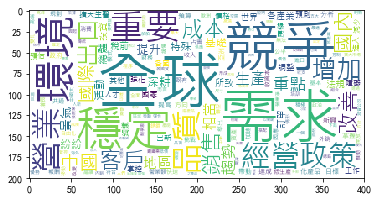

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [19]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:30]

[('全球', 100),
 ('需求', 93),
 ('競爭', 83),
 ('穩定', 58),
 ('環境', 48),
 ('重要', 48),
 ('品質', 39),
 ('營業', 39),
 ('經營', 33),
 ('政策', 32),
 ('增加', 31),
 ('出口', 29),
 ('客戶', 29),
 ('成本', 27),
 ('改善', 26),
 ('銷售', 26),
 ('國內', 25),
 ('中國', 24),
 ('國際', 24),
 ('重點', 24),
 ('趨勢', 22),
 ('生產', 21),
 ('地區', 20),
 ('相當', 20),
 ('提升', 19),
 ('景氣', 19),
 ('深耕', 19),
 ('紛紛', 19),
 ('基礎', 18),
 ('特殊', 18)]

In [20]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xfeeedd8>,
 <a list of 10 Text xticklabel objects>)

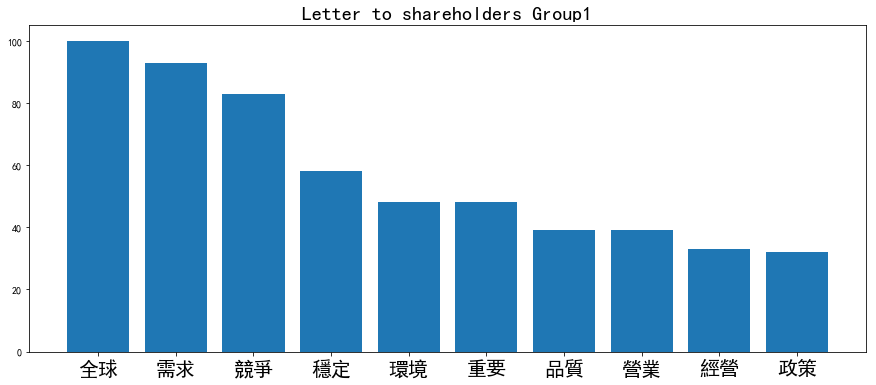

In [21]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group1",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [22]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.42733259,  0.31158506],
       [-0.26788176, -0.1194694 ],
       [ 0.00482407, -0.2226581 ],
       [ 0.22696797, -0.37244755],
       [ 0.46342232,  0.40299   ]])

No handles with labels found to put in legend.


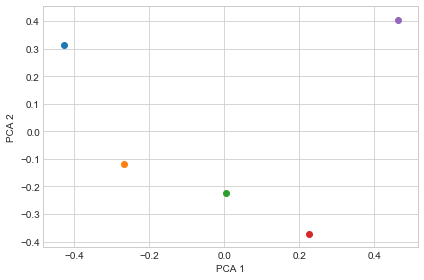

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

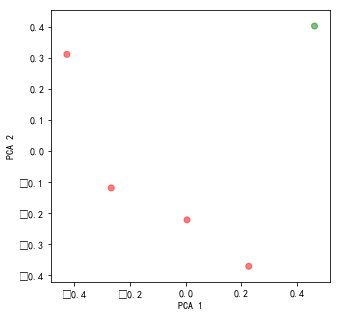

In [26]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (5,5))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()